In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
df= pd.read_csv('insurance_cross_sell.csv') 
df.shape

(381109, 12)

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [5]:
df.isna()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,False,False,False,False,False,False,False,False,False,False,False,False
381105,False,False,False,False,False,False,False,False,False,False,False,False
381106,False,False,False,False,False,False,False,False,False,False,False,False
381107,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='Vehicle_Age', ylabel='count'>

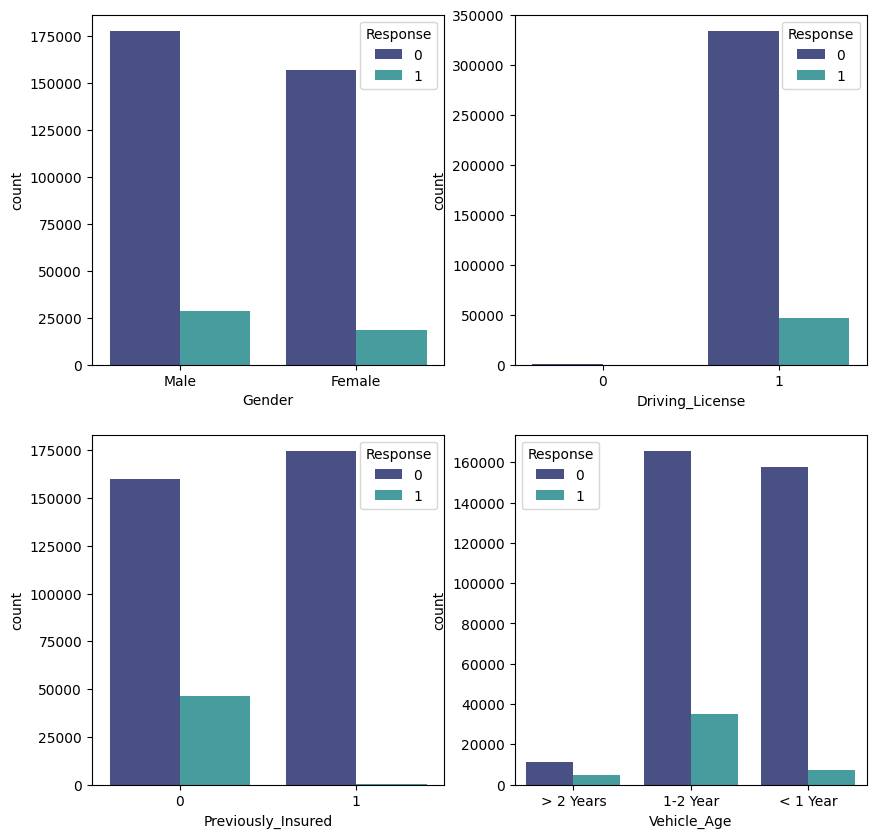

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) 
sns.countplot(ax=axes[0,0],x='Gender',hue='Response',data=df,palette="mako") 
sns.countplot(ax=axes[0,1],x='Driving_License',hue='Response',data=df,palette="mako") 
sns.countplot(ax=axes[1,0],x='Previously_Insured',hue='Response',data=df,palette="mako") 
sns.countplot(ax=axes[1,1],x='Vehicle_Age',hue='Response',data=df,palette="mako")

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

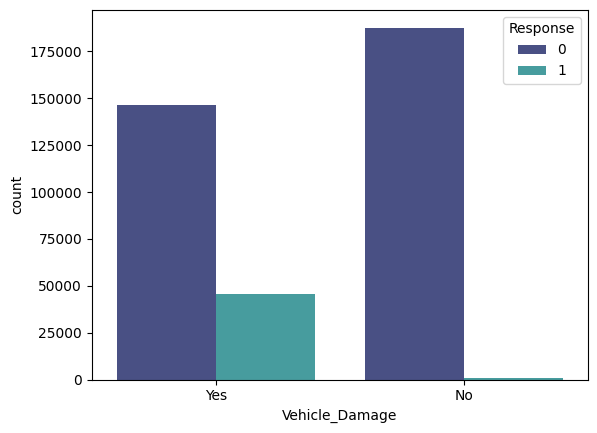

In [7]:
sns.countplot(x='Vehicle_Damage',hue='Response',data=df,palette="mako")

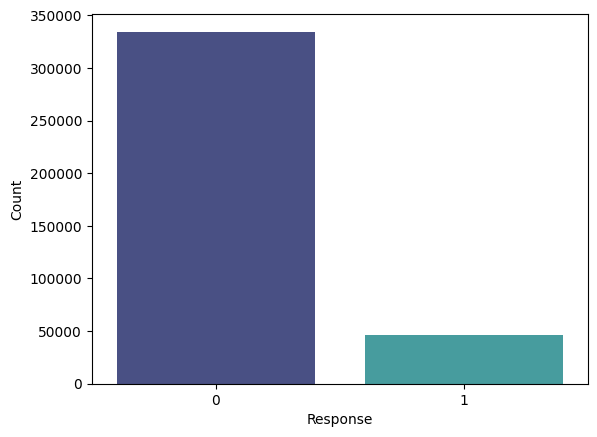

In [8]:
Response = df.loc[:, "Response"].value_counts().rename('Count')
plt.xlabel("Response")
plt.ylabel('Count')
sns.barplot(x=Response.index, y=Response.values, hue=Response.index, palette="mako", legend=False)

plt.show()

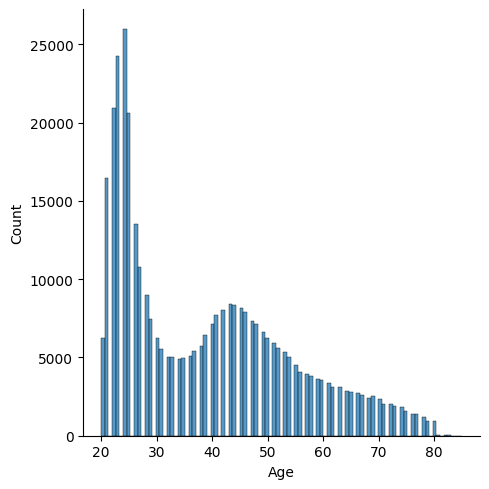

In [9]:
sns.displot(df['Age'])

<Axes: xlabel='Annual_Premium', ylabel='Density'>

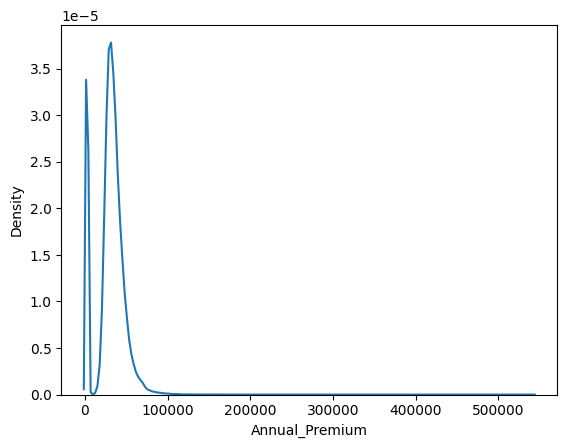

In [11]:
sns.kdeplot(df['Annual_Premium'])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
df= pd.read_csv('insurance_cross_sell.csv') 
df.shape

(381109, 12)

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [ ]:
df.isna()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,False,False,False,False,False,False,False,False,False,False,False,False
381105,False,False,False,False,False,False,False,False,False,False,False,False
381106,False,False,False,False,False,False,False,False,False,False,False,False
381107,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='Vehicle_Age', ylabel='count'>

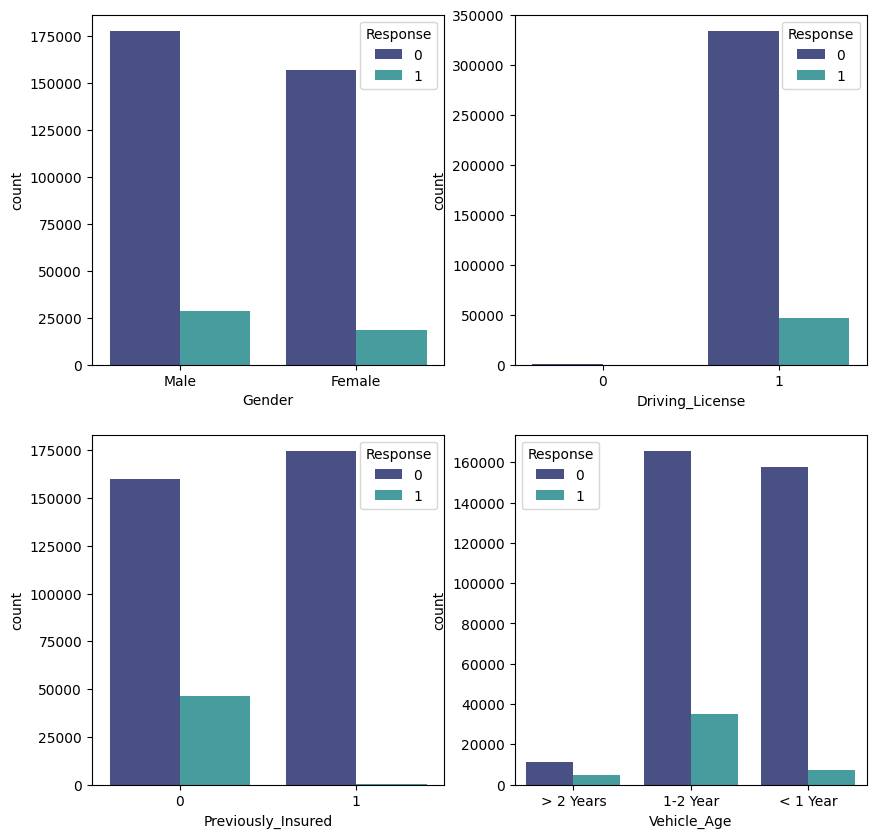

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) 
sns.countplot(ax=axes[0,0],x='Gender',hue='Response',data=df,palette="mako") 
sns.countplot(ax=axes[0,1],x='Driving_License',hue='Response',data=df,palette="mako") 
sns.countplot(ax=axes[1,0],x='Previously_Insured',hue='Response',data=df,palette="mako") 
sns.countplot(ax=axes[1,1],x='Vehicle_Age',hue='Response',data=df,palette="mako")

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

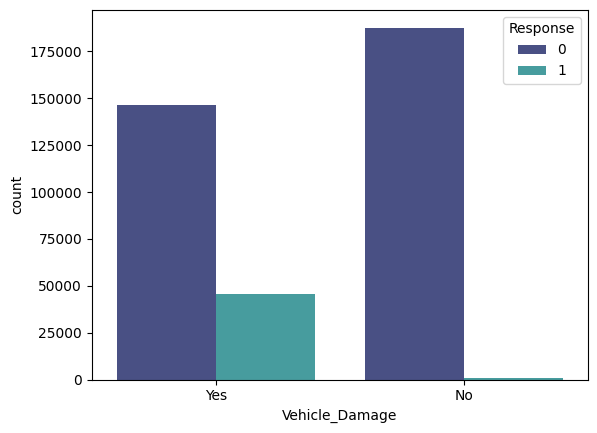

In [ ]:
sns.countplot(x='Vehicle_Damage',hue='Response',data=df,palette="mako")

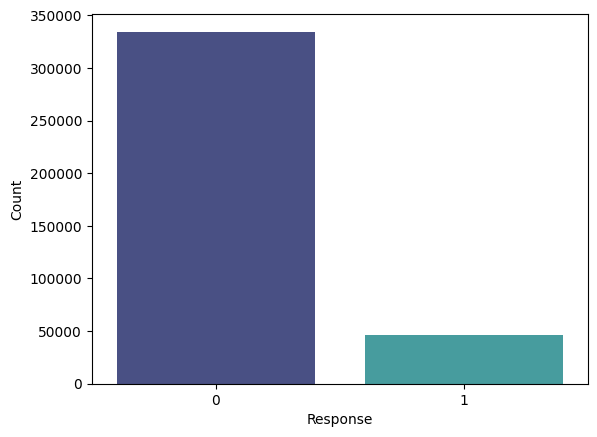

In [ ]:
Response = df.loc[:, "Response"].value_counts().rename('Count')
plt.xlabel("Response")
plt.ylabel('Count')
sns.barplot(x=Response.index, y=Response.values, hue=Response.index, palette="mako", legend=False)

plt.show()

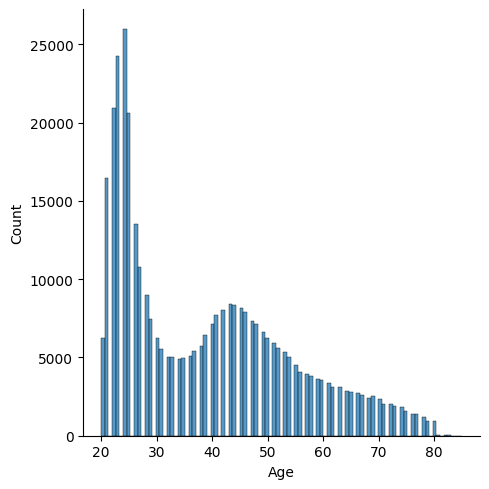

In [ ]:
sns.displot(df['Age'])

<Axes: xlabel='Annual_Premium', ylabel='Density'>

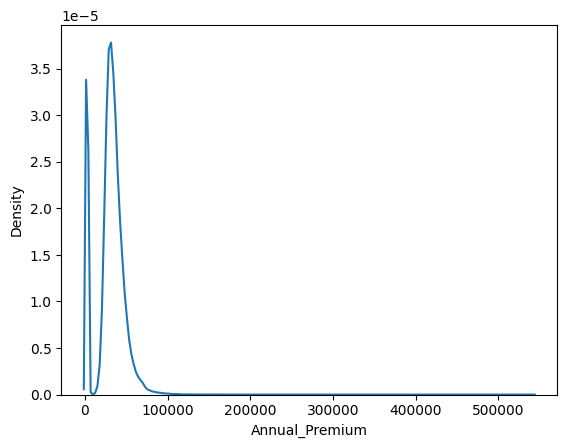

In [ ]:
sns.kdeplot(df['Annual_Premium'])

In [ ]:
def data_prep(df):
    df= df.drop(columns=['id','Policy_Sales_Channel','Vintage'])
    df=pd.get_dummies(df,columns=['Gender'] ,prefix='Gender')
    df=pd.get_dummies(df,columns=['Vehicle_Damage'] ,prefix='Damage')
    df=pd.get_dummies(df,columns=['Driving_License'] ,prefix='License')
    df=pd.get_dummies(df,columns=['Previously_Insured'] ,prefix='prev_insured')
    df["Age"] = pd.cut(df['Age'], bins=[0, 29, 35, 50, 100])
    df['Age']= df['Age'].cat.codes
    df['Annual_Premium'] = pd.cut(df['Annual_Premium'], bins=[0, 30000, 35000,40000, 45000, 50000, np.inf])
    df['Annual_Premium']= df['Annual_Premium'].cat.codes
    df['Vehicle_Age'] =df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
    df.drop(columns=['Region_Code'],inplace= True)
    return df

In [ ]:
df1=data_prep(df)

In [ ]:
df1.head()

,Age,Vehicle_Age,Annual_Premium,Response,Gender_Female,Gender_Male,Damage_No,Damage_Yes,License_0,License_1,prev_insured_0,prev_insured_1
0,2,2,3,1,0,1,0,1,0,1,1,0
1,3,1,1,0,0,1,1,0,0,1,1,0
2,2,2,2,1,0,1,0,1,0,1,1,0
3,0,0,0,0,0,1,1,0,0,1,0,1
4,0,0,0,0,1,0,1,0,0,1,0,1


In [ ]:
Features= ['Age','Vehicle_Age','Annual_Premium',"Gender_Female","Gender_Male","Damage_No","Damage_Yes","License_0","License_1" ,"prev_insured_0", "prev_insured_1"]

In [ ]:
# Lets split features and target variable into X and y
X = df1[Features]
y =df1['Response']

In [ ]:
from imblearn.over_sampling import SMOTE
# Lets oversample our dataset using SMOTE
sm = SMOTE(random_state=42)
X_res,y_res= sm.fit_resample(X,y)

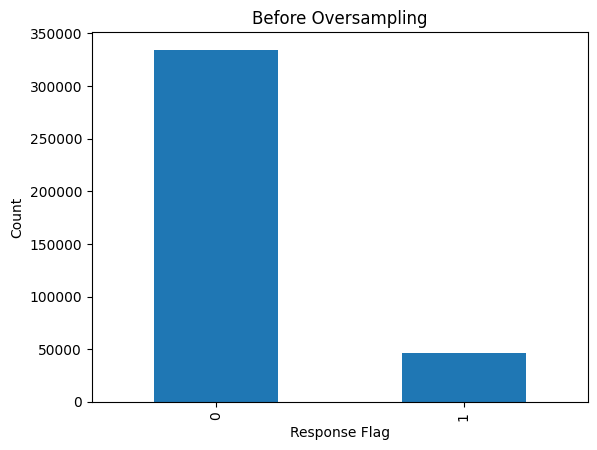

In [ ]:
df1['Response'].value_counts().plot(kind="bar")
plt.xlabel("Response Flag")
plt.ylabel("Count")
plt.title("Before Oversampling")
plt.show()

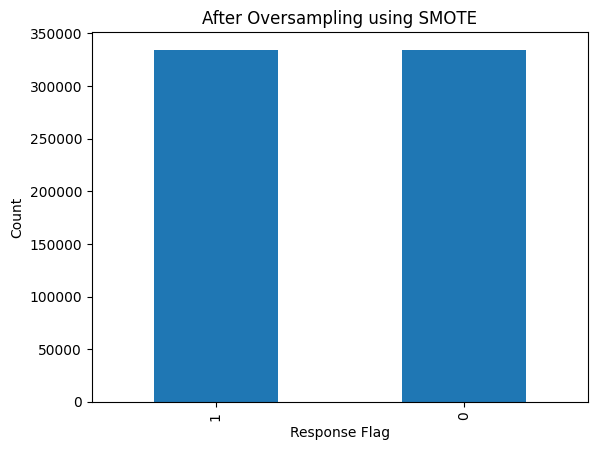

In [ ]:
y_res.value_counts().plot(kind="bar")
plt.xlabel("Response Flag")
plt.ylabel("Count")
plt.title("After Oversampling using SMOTE")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X_res, y_res, test_size=0.30, random_state=42,stratify=y_res)

In [ ]:
X_train.shape,X_test.shape

((468158, 11), (200640, 11))

In [ ]:
log_model = LogisticRegression(random_state=42)
Forest= RandomForestClassifier(random_state=42) 

In [ ]:
log_model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
Forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
def evaluate_model_performance(model, X_test, y_test, average='binary'):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=average)
    recall = recall_score(y_test, y_pred, average=average)
    f1 = f1_score(y_test, y_pred, average=average)
    return accuracy, precision, recall, f1

In [ ]:
log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1 = evaluate_model_performance(log_model, X_test, y_test)
RandomForest_accuracy, RandomForest_precision, RandomForest_recall, RandomForest_f1 = evaluate_model_performance(Forest, X_test, y_test)

In [ ]:
print("Logistic Regression Performance:")
print(f"Accuracy: {log_reg_accuracy:.4f}")
print(f"Precision: {log_reg_precision:.4f}")
print(f"Recall: {log_reg_recall:.4f}")
print(f"F1-score: {log_reg_f1:.4f}")
print()

Logistic Regression Performance:
Accuracy: 0.7845
Precision: 0.7057
Recall: 0.9762
F1-score: 0.8192



In [ ]:
print("RandomForest Performance:")
print(f"Accuracy: {RandomForest_accuracy:.4f}")
print(f"Precision: { RandomForest_precision:.4f}")
print(f"Recall: {RandomForest_recall:.4f}")
print(f"F1-score: {RandomForest_f1:.4f}")

RandomForest Performance:
Accuracy: 0.7887
Precision: 0.7249
Recall: 0.9306
F1-score: 0.8149


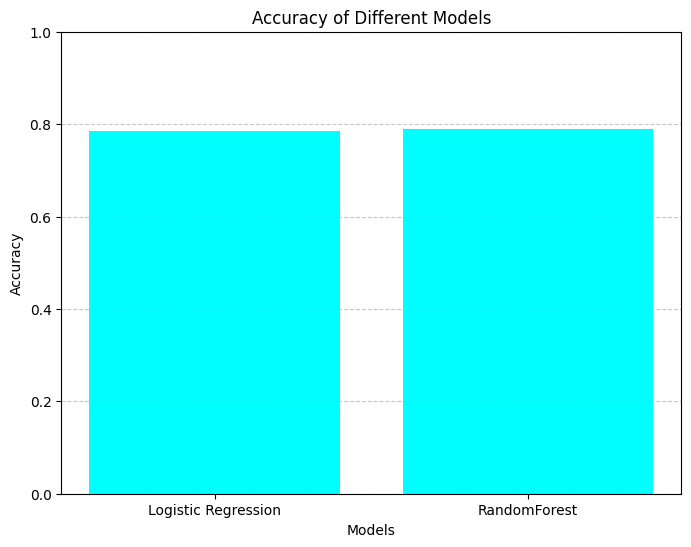

In [ ]:
accuracies = [log_reg_accuracy,  RandomForest_accuracy]
models = ['Logistic Regression', 'RandomForest']

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['aqua'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.0, 1.0)  # Set the y-axis limits to ensure visibility of differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


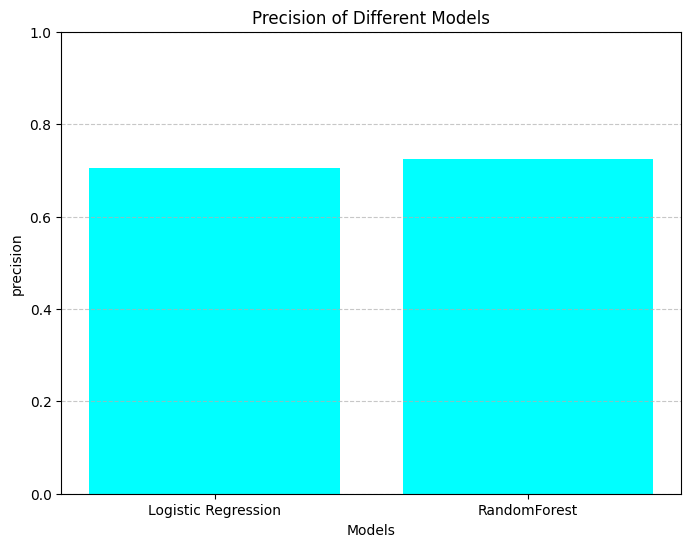

In [ ]:
# Accuracy values (example values, replace with your actual values)
precision=[log_reg_precision,RandomForest_precision]
models = ['Logistic Regression','RandomForest']

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, precision, color=['aqua'])
plt.xlabel('Models')
plt.ylabel('precision')
plt.title('Precision of Different Models')
plt.ylim(0.0, 1.0)  # Set the y-axis limits to ensure visibility of differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


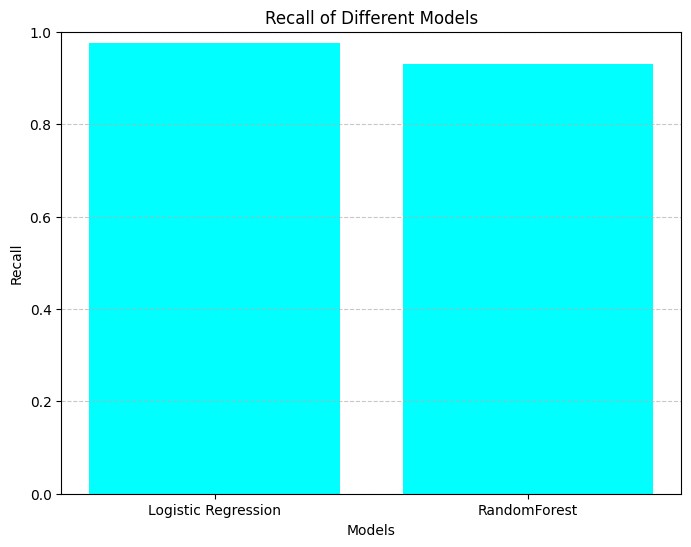

In [ ]:
recall=[log_reg_recall,  RandomForest_recall]
models = ['Logistic Regression', 'RandomForest']
plt.figure(figsize=(8, 6))
plt.bar(models, recall, color=['aqua'])
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall of Different Models')
plt.ylim(0.0, 1.0)  # Set the y-axis limits to ensure visibility of differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


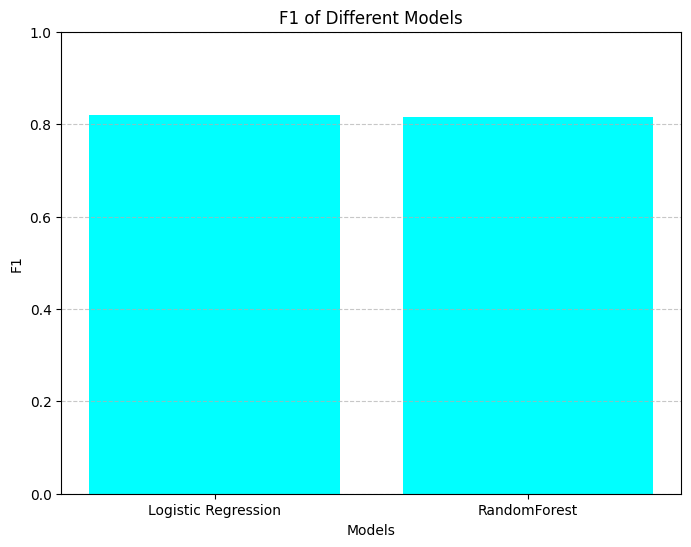

In [ ]:
f1=[log_reg_f1, RandomForest_f1]
models = ['Logistic Regression', 'RandomForest']
plt.figure(figsize=(8, 6))
plt.bar(models, f1, color=['aqua'])
plt.xlabel('Models')
plt.ylabel('F1')
plt.title('F1 of Different Models')
plt.ylim(0.0, 1.0)  # Set the y-axis limits to ensure visibility of differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
def data_prep(df):
    df= df.drop(columns=['id','Policy_Sales_Channel','Vintage'])
    df=pd.get_dummies(df,columns=['Gender'] ,prefix='Gender')
    df=pd.get_dummies(df,columns=['Vehicle_Damage'] ,prefix='Damage')
    df=pd.get_dummies(df,columns=['Driving_License'] ,prefix='License')
    df=pd.get_dummies(df,columns=['Previously_Insured'] ,prefix='prev_insured')
    df["Age"] = pd.cut(df['Age'], bins=[0, 29, 35, 50, 100])
    df['Age']= df['Age'].cat.codes
    df['Annual_Premium'] = pd.cut(df['Annual_Premium'], bins=[0, 30000, 35000,40000, 45000, 50000, np.inf])
    df['Annual_Premium']= df['Annual_Premium'].cat.codes
    df['Vehicle_Age'] =df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
    df.drop(columns=['Region_Code'],inplace= True)
    return df

In [13]:
df1=data_prep(df)

In [14]:
df1.head()

,Age,Vehicle_Age,Annual_Premium,Response,Gender_Female,Gender_Male,Damage_No,Damage_Yes,License_0,License_1,prev_insured_0,prev_insured_1
0,2,2,3,1,0,1,0,1,0,1,1,0
1,3,1,1,0,0,1,1,0,0,1,1,0
2,2,2,2,1,0,1,0,1,0,1,1,0
3,0,0,0,0,0,1,1,0,0,1,0,1
4,0,0,0,0,1,0,1,0,0,1,0,1


In [15]:
Features= ['Age','Vehicle_Age','Annual_Premium',"Gender_Female","Gender_Male","Damage_No","Damage_Yes","License_0","License_1" ,"prev_insured_0", "prev_insured_1"]

In [16]:
# Lets split features and target variable into X and y
X = df1[Features]
y =df1['Response']

In [17]:
from imblearn.over_sampling import SMOTE
# Lets oversample our dataset using SMOTE
sm = SMOTE(random_state=42)
X_res,y_res= sm.fit_resample(X,y)

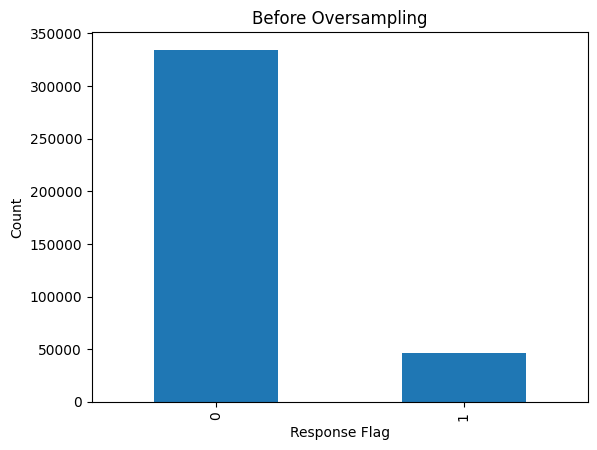

In [18]:
df1['Response'].value_counts().plot(kind="bar")
plt.xlabel("Response Flag")
plt.ylabel("Count")
plt.title("Before Oversampling")
plt.show()

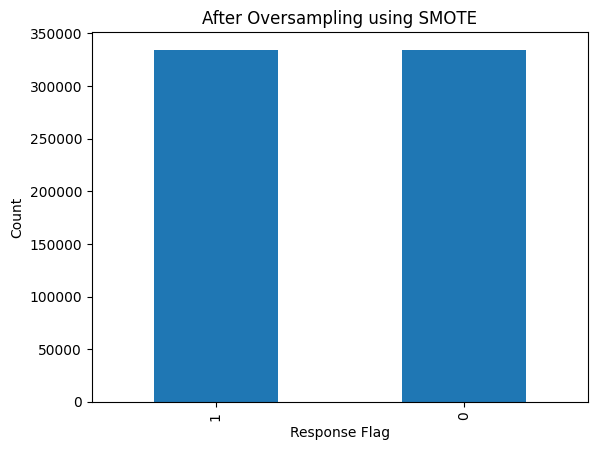

In [19]:
y_res.value_counts().plot(kind="bar")
plt.xlabel("Response Flag")
plt.ylabel("Count")
plt.title("After Oversampling using SMOTE")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X_res, y_res, test_size=0.30, random_state=42,stratify=y_res)

In [21]:
X_train.shape,X_test.shape

((468158, 11), (200640, 11))

In [22]:
log_model = LogisticRegression(random_state=42)
Forest= RandomForestClassifier(random_state=42) 

In [23]:
log_model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [24]:
Forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [25]:
def evaluate_model_performance(model, X_test, y_test, average='binary'):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=average)
    recall = recall_score(y_test, y_pred, average=average)
    f1 = f1_score(y_test, y_pred, average=average)
    return accuracy, precision, recall, f1

In [26]:
log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1 = evaluate_model_performance(log_model, X_test, y_test)
RandomForest_accuracy, RandomForest_precision, RandomForest_recall, RandomForest_f1 = evaluate_model_performance(Forest, X_test, y_test)

In [27]:
print("Logistic Regression Performance:")
print(f"Accuracy: {log_reg_accuracy:.4f}")
print(f"Precision: {log_reg_precision:.4f}")
print(f"Recall: {log_reg_recall:.4f}")
print(f"F1-score: {log_reg_f1:.4f}")
print()

Logistic Regression Performance:
Accuracy: 0.7845
Precision: 0.7057
Recall: 0.9762
F1-score: 0.8192



In [28]:
print("RandomForest Performance:")
print(f"Accuracy: {RandomForest_accuracy:.4f}")
print(f"Precision: { RandomForest_precision:.4f}")
print(f"Recall: {RandomForest_recall:.4f}")
print(f"F1-score: {RandomForest_f1:.4f}")

RandomForest Performance:
Accuracy: 0.7887
Precision: 0.7249
Recall: 0.9306
F1-score: 0.8149


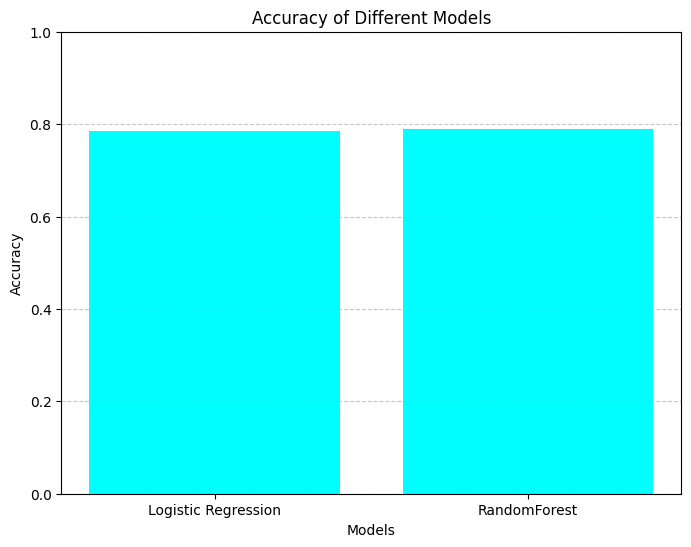

In [29]:
accuracies = [log_reg_accuracy,  RandomForest_accuracy]
models = ['Logistic Regression', 'RandomForest']

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['aqua'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.0, 1.0)  # Set the y-axis limits to ensure visibility of differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


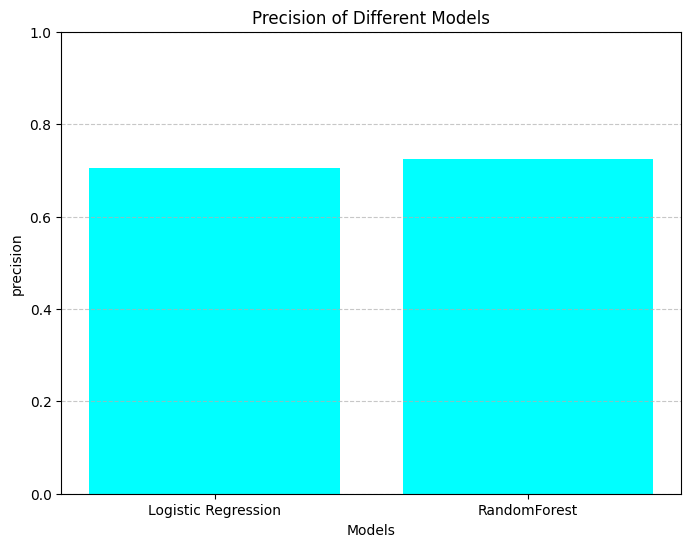

In [30]:
# Accuracy values (example values, replace with your actual values)
precision=[log_reg_precision,RandomForest_precision]
models = ['Logistic Regression','RandomForest']

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, precision, color=['aqua'])
plt.xlabel('Models')
plt.ylabel('precision')
plt.title('Precision of Different Models')
plt.ylim(0.0, 1.0)  # Set the y-axis limits to ensure visibility of differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


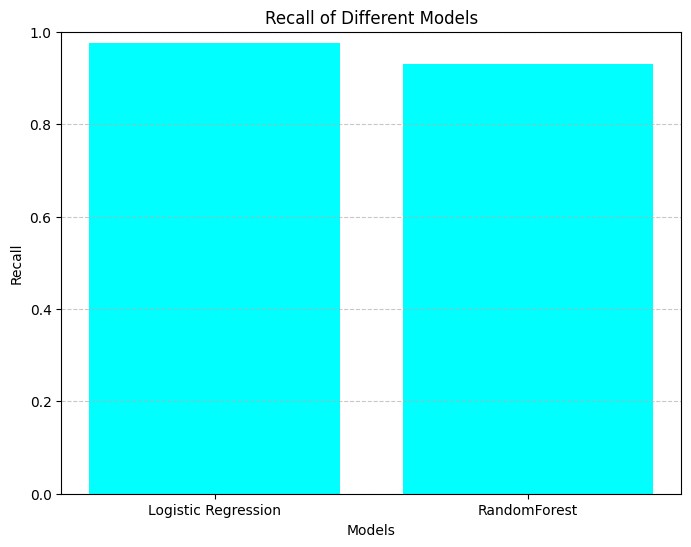

In [31]:
recall=[log_reg_recall,  RandomForest_recall]
models = ['Logistic Regression', 'RandomForest']
plt.figure(figsize=(8, 6))
plt.bar(models, recall, color=['aqua'])
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall of Different Models')
plt.ylim(0.0, 1.0)  # Set the y-axis limits to ensure visibility of differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


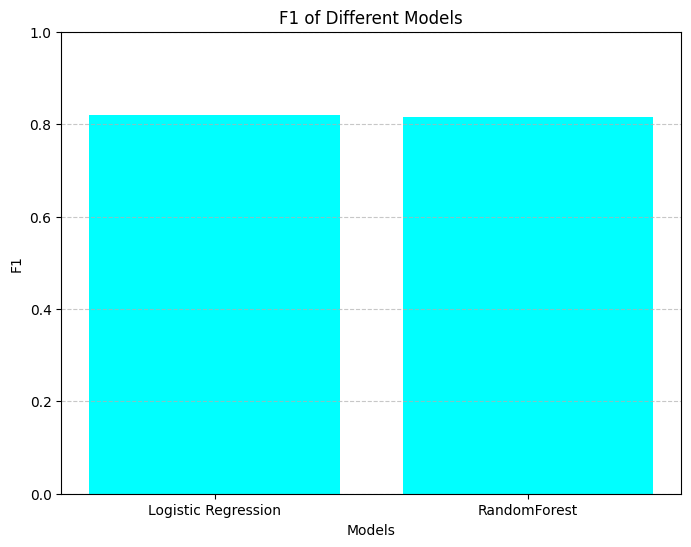

In [32]:
f1=[log_reg_f1, RandomForest_f1]
models = ['Logistic Regression', 'RandomForest']
plt.figure(figsize=(8, 6))
plt.bar(models, f1, color=['aqua'])
plt.xlabel('Models')
plt.ylabel('F1')
plt.title('F1 of Different Models')
plt.ylim(0.0, 1.0)  # Set the y-axis limits to ensure visibility of differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()